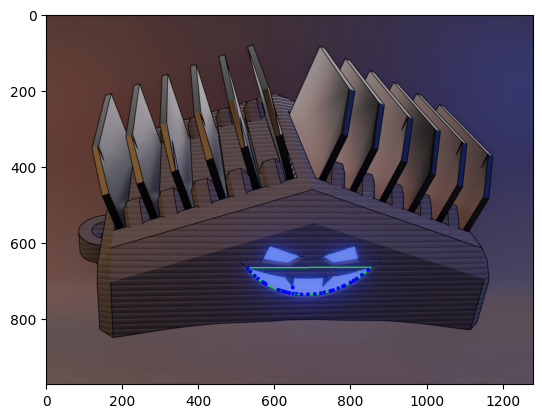

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('../lab1/test.jpg')
# img = cv.imread('./star_c.jpg')
assert img is not None, "Файл не найден"

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Бинаризация (порог 127)
ret, thresh = cv.threshold(img_gray, 127, 255, 0)

# Поиск контуров 
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
assert len(contours) > 0, "no contours found"
cnt = contours[0]

# Строим выпуклую оболочку (returnPoints=False — возвращает индексы точек)
hull = cv.convexHull(cnt, returnPoints = False)
defects = cv.convexityDefects(cnt, hull)

# Рисуем линии и точки для дефектов
for i in range(defects.shape[0]):
    s, e, f, d = defects[i, 0]          # индексы начала, конца, дефектной точки, расстояние
    start = tuple(cnt[s][0])            # начальная точка
    end   = tuple(cnt[e][0])            # конечная точка
    far   = tuple(cnt[f][0])            # дефектная точка (самое глубокое место)
    cv.line(img, start, end, [0,255,0], 2)   # рисуем зелёные линии
    cv.circle(img, far, 5, [0,0,255], -1)    # рисуем красную точку в месте дефекта

plt.imshow(img)

In [14]:
# 2 Point Polygon Test (расстояние от точки до контура)
# Определяет, где находится точка относительно контура:
# > 0 — внутри, < 0 — снаружи, = 0 — на контуре
# Если третий параметр = True, возвращает расстояние до ближайшей точки контура
dist = cv.pointPolygonTest(cnt, (50,50), True)
print(dist)

-779.7050724472683


In [15]:
# 3 Match Shapes (сравнение формы контуров)
img1 = cv.imread('./star_c.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('./star2_c.jpg', cv.IMREAD_GRAYSCALE)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

# Бинаризация обоих изображений
ret, thresh  = cv.threshold(img1, 127, 255, 0)
ret, thresh2 = cv.threshold(img2, 127, 255, 0)

# Поиск контуров для первого изображения
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
assert len(contours) > 0, "no contours found"
cnt1 = contours[0]

# Поиск контуров для второго изображения
contours, hierarchy = cv.findContours(thresh2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
assert len(contours) > 0, "no contours found"
cnt2 = contours[0]

# Сравнение двух контуров по методу Hu Moments
# Чем меньше значение ret, тем больше схожесть форм
ret = cv.matchShapes(cnt1, cnt2, 1, 0.0)
print(ret)

0.07906590198862318
